# Linking models to data

Before delving into complex procedures of fitting complicated circadian models time series. We practically explore how to link models to data using the very simple example of a Transcription factor to DNA.

We described last time a simple mode for a transcription factor to DNA. Now we can use this model to infer the affinity of using experimental data. In particular we can use data from Electromobility shift assay. In this type of assay we use a constant concentration of DNA then we ask what is the affinity that a transcription factor "feel" for DNA. 

We can take as an example data form the following Nature methods paper.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2757439/

We will also use ImageJ in order to convert images into numerical values that we will use for inferring the affinity constants. 

In [2]:
%pylab inline 
import pandas as pd
from IPython.display import Image
import lmfit


Populating the interactive namespace from numpy and matplotlib


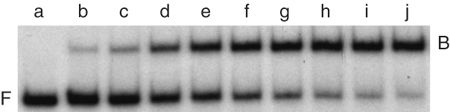

In [3]:
Image('data/HellmanLanceFigure1.jpg', width=600,height=600)

After quantifying with ImageJ using mean value of gray scale, we can save that data in an excel file. Then export it into our jupyter notebook as follow

In [4]:
B = pd.read_excel('data/HellmanCuantification.xlsx', sheet_name='B')
F = pd.read_excel('data/HellmanCuantification.xlsx', sheet_name='F')

In [8]:
B.head()

,measurment,area,mean
0,0.000000,975,208.198
1,0.466667,975,187.954
2,0.933333,975,171.152
3,1.866667,975,144.649
4,2.800000,975,125.067


Text(0,0.5,'Mean gray value')

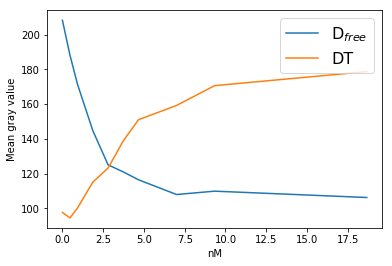

In [14]:
#figure(dpi=200)
plot(B.iloc[:,0],B.iloc[:,2], label='D$_{free}$')
plot(F.iloc[:,0],F.iloc[:,2], label='DT')
legend(loc='upper right', fontsize=16)
xlabel('nM')
ylabel('Mean gray value')

Text(0,0.5,'Mean gray value')

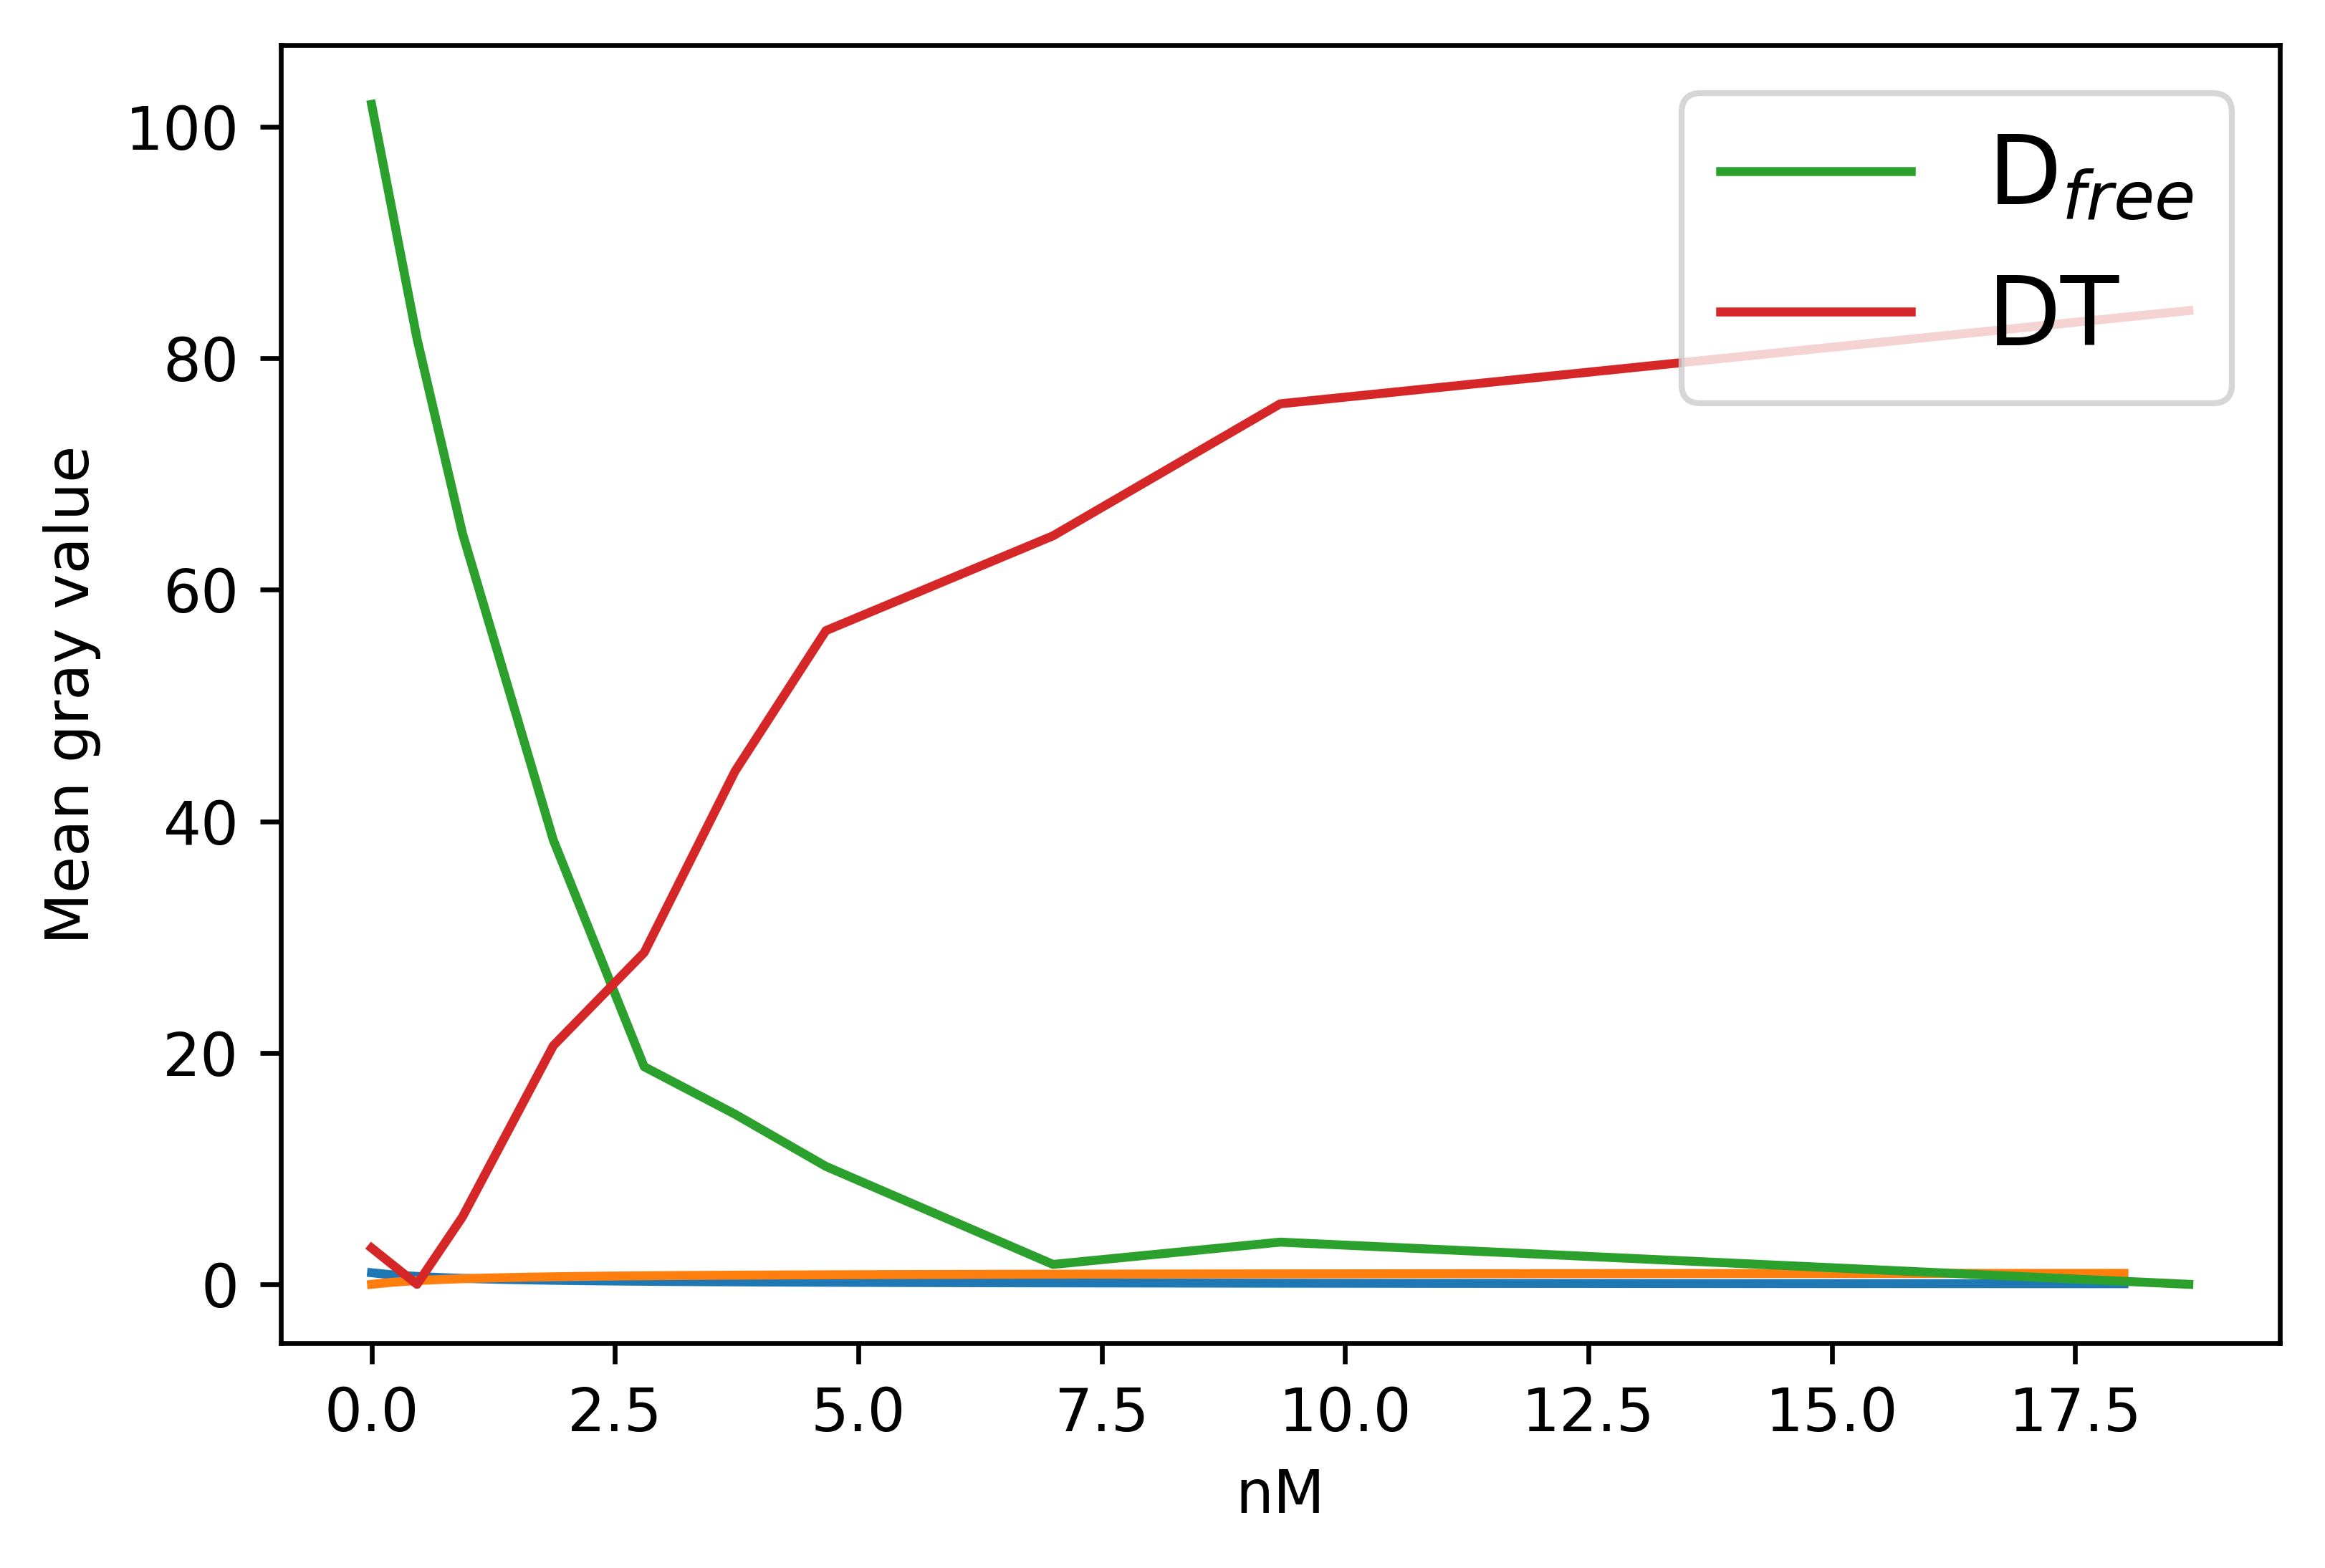

In [15]:
figure(dpi=600)
T = linspace(0,18,100)
kd=1
D = kd/(kd+T)
plot(T,D)
DT = T/(kd+T)
plot(T,DT)
plot(B.iloc[:,0],B.iloc[:,2]-min(B.iloc[:,2]), label='D$_{free}$')
plot(F.iloc[:,0],F.iloc[:,2]-min(F.iloc[:,2]), label='DT')
legend(loc='upper right', fontsize=16)
xlabel('nM')
ylabel('Mean gray value')

Text(0,0.5,'Mean gray value')

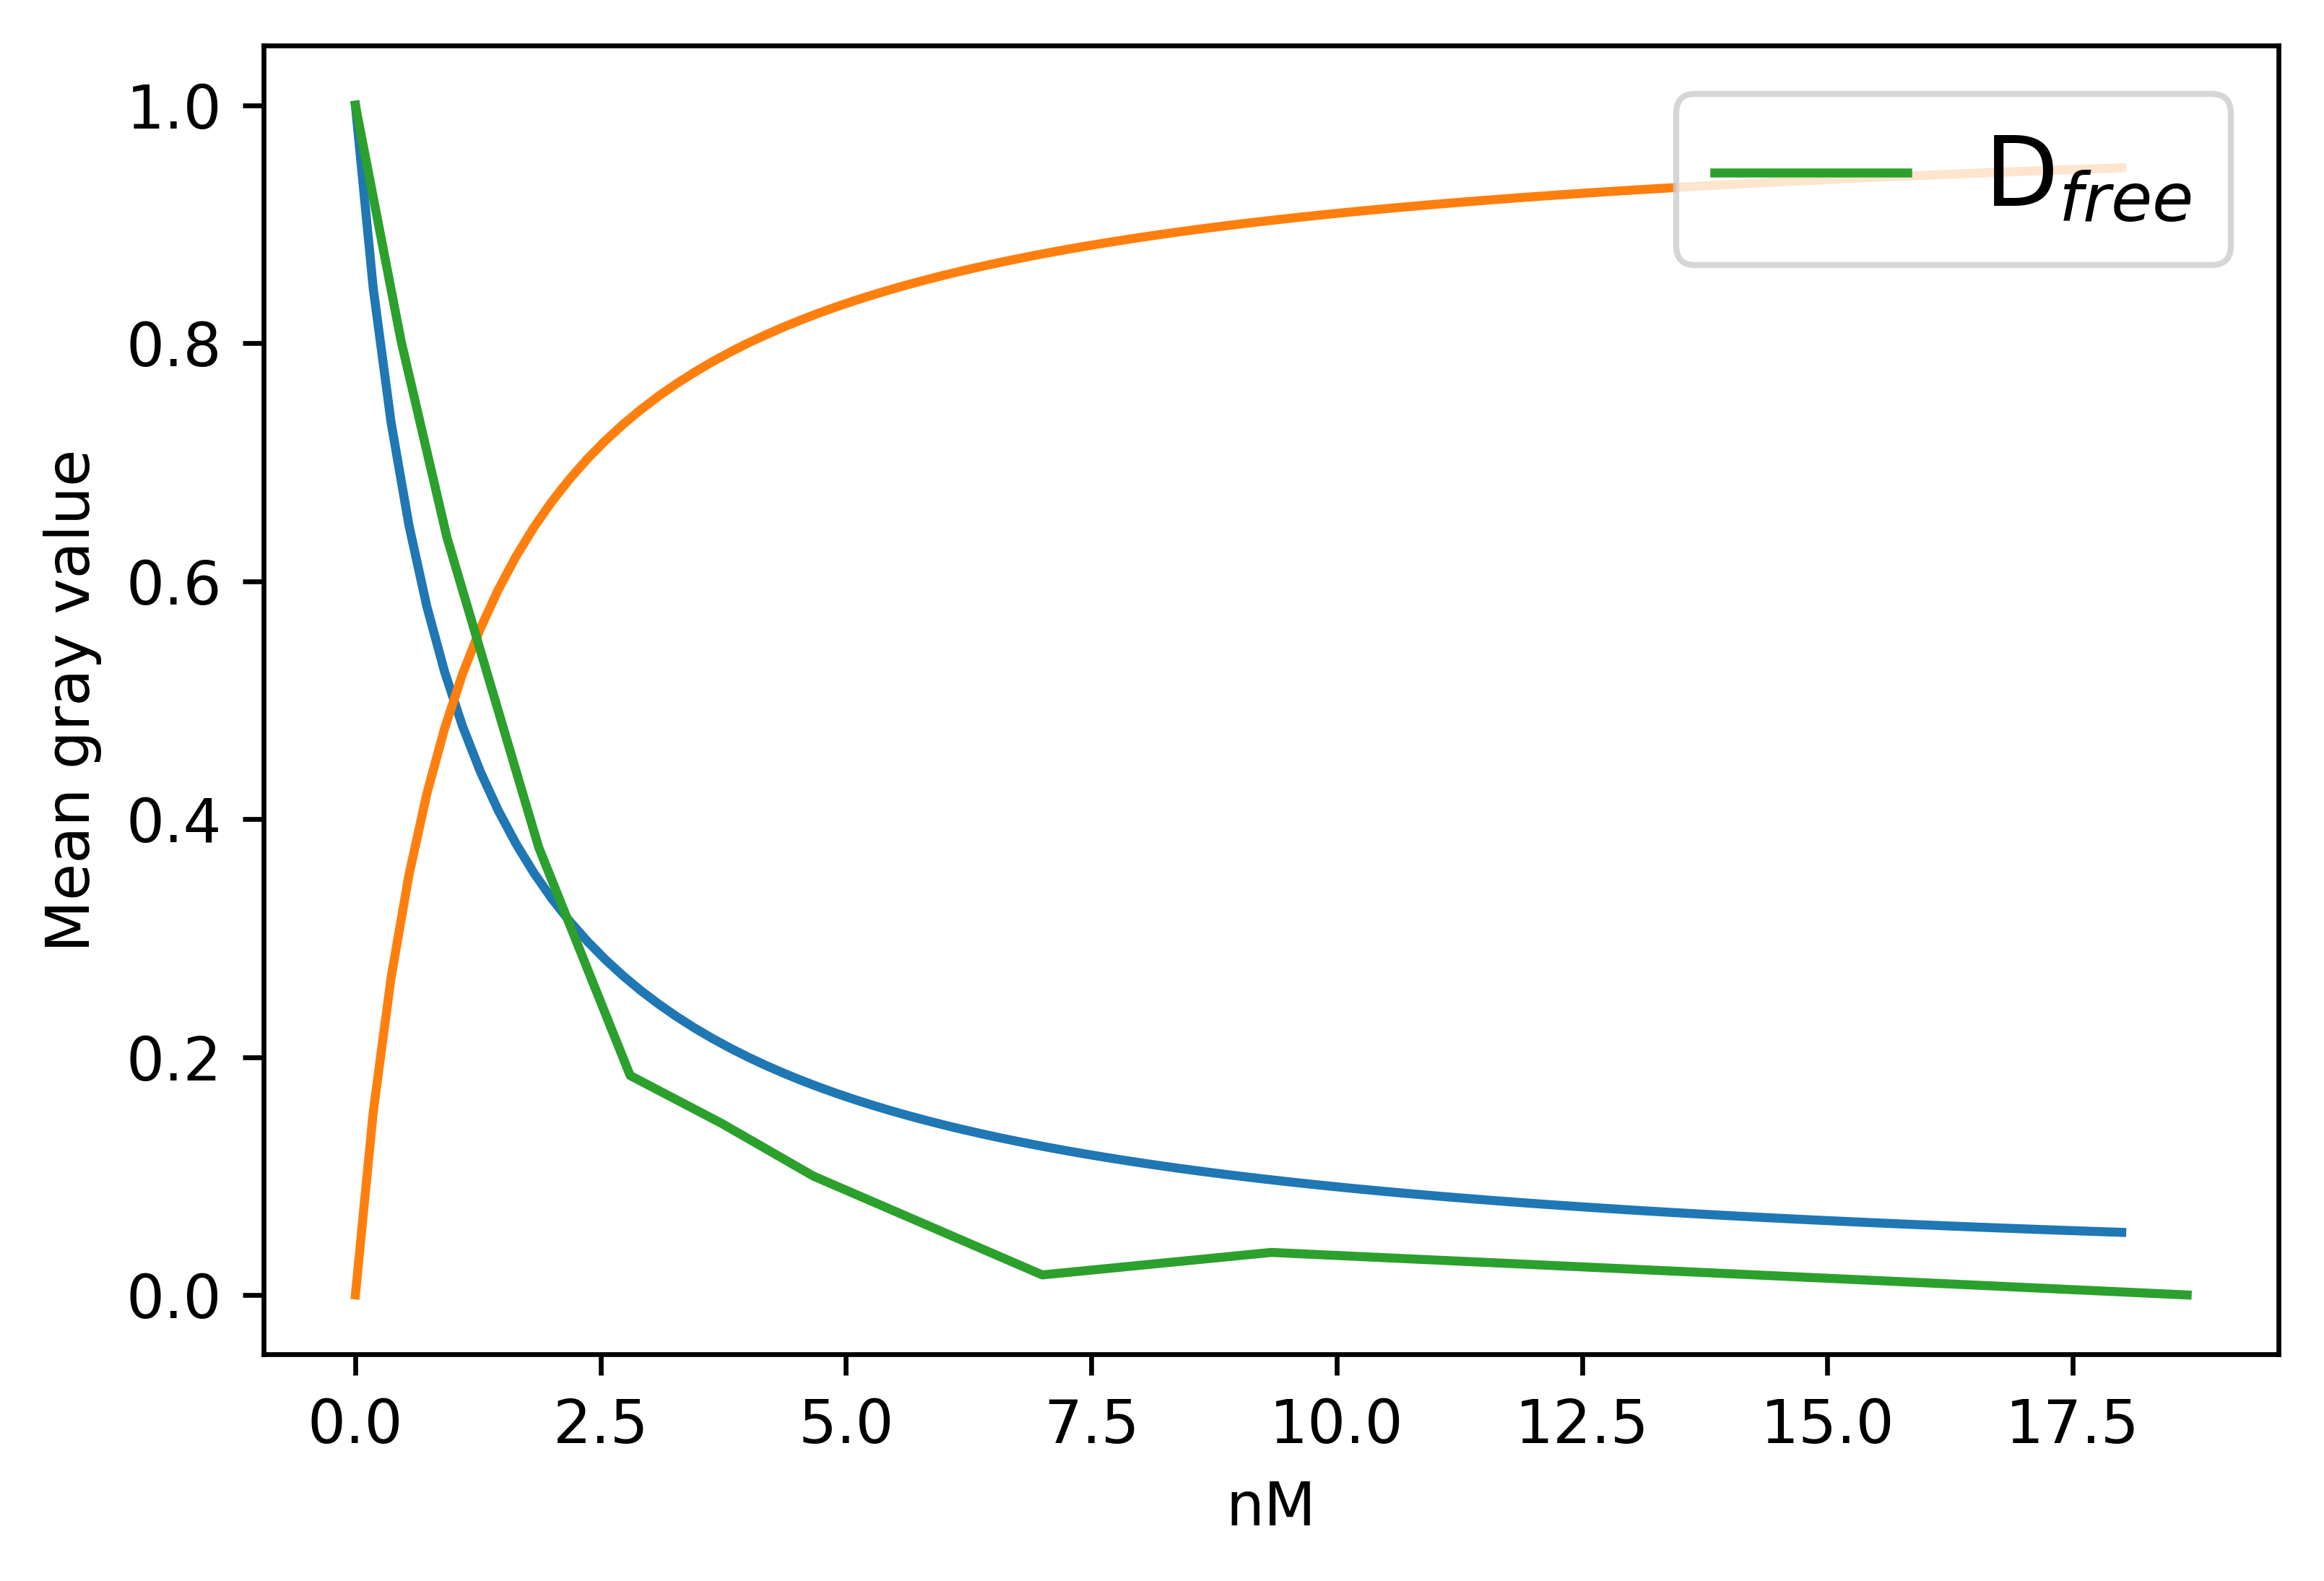

In [17]:
figure(dpi=600)
T = linspace(0,18,100)
kd=1
D = kd/(kd+T)
plot(T,D)
DT = T/(kd+T)
plot(T,DT)
B_num = (B.iloc[:,2]-min(B.iloc[:,2]))
B_den = max((B.iloc[:,2]-min(B.iloc[:,2])))
B_norm = (B.iloc[:,2]-min(B.iloc[:,2]))/max((B.iloc[:,2]-min(B.iloc[:,2])))

plot(B.iloc[:,0],B_norm, label='D$_{free}$')



#plot(F.iloc[:,0],F.iloc[:,2]-min(F.iloc[:,2]), label='DT')
legend(loc='upper right', fontsize=16)
xlabel('nM')
ylabel('Mean gray value')

Text(0,0.5,'Mean gray value')

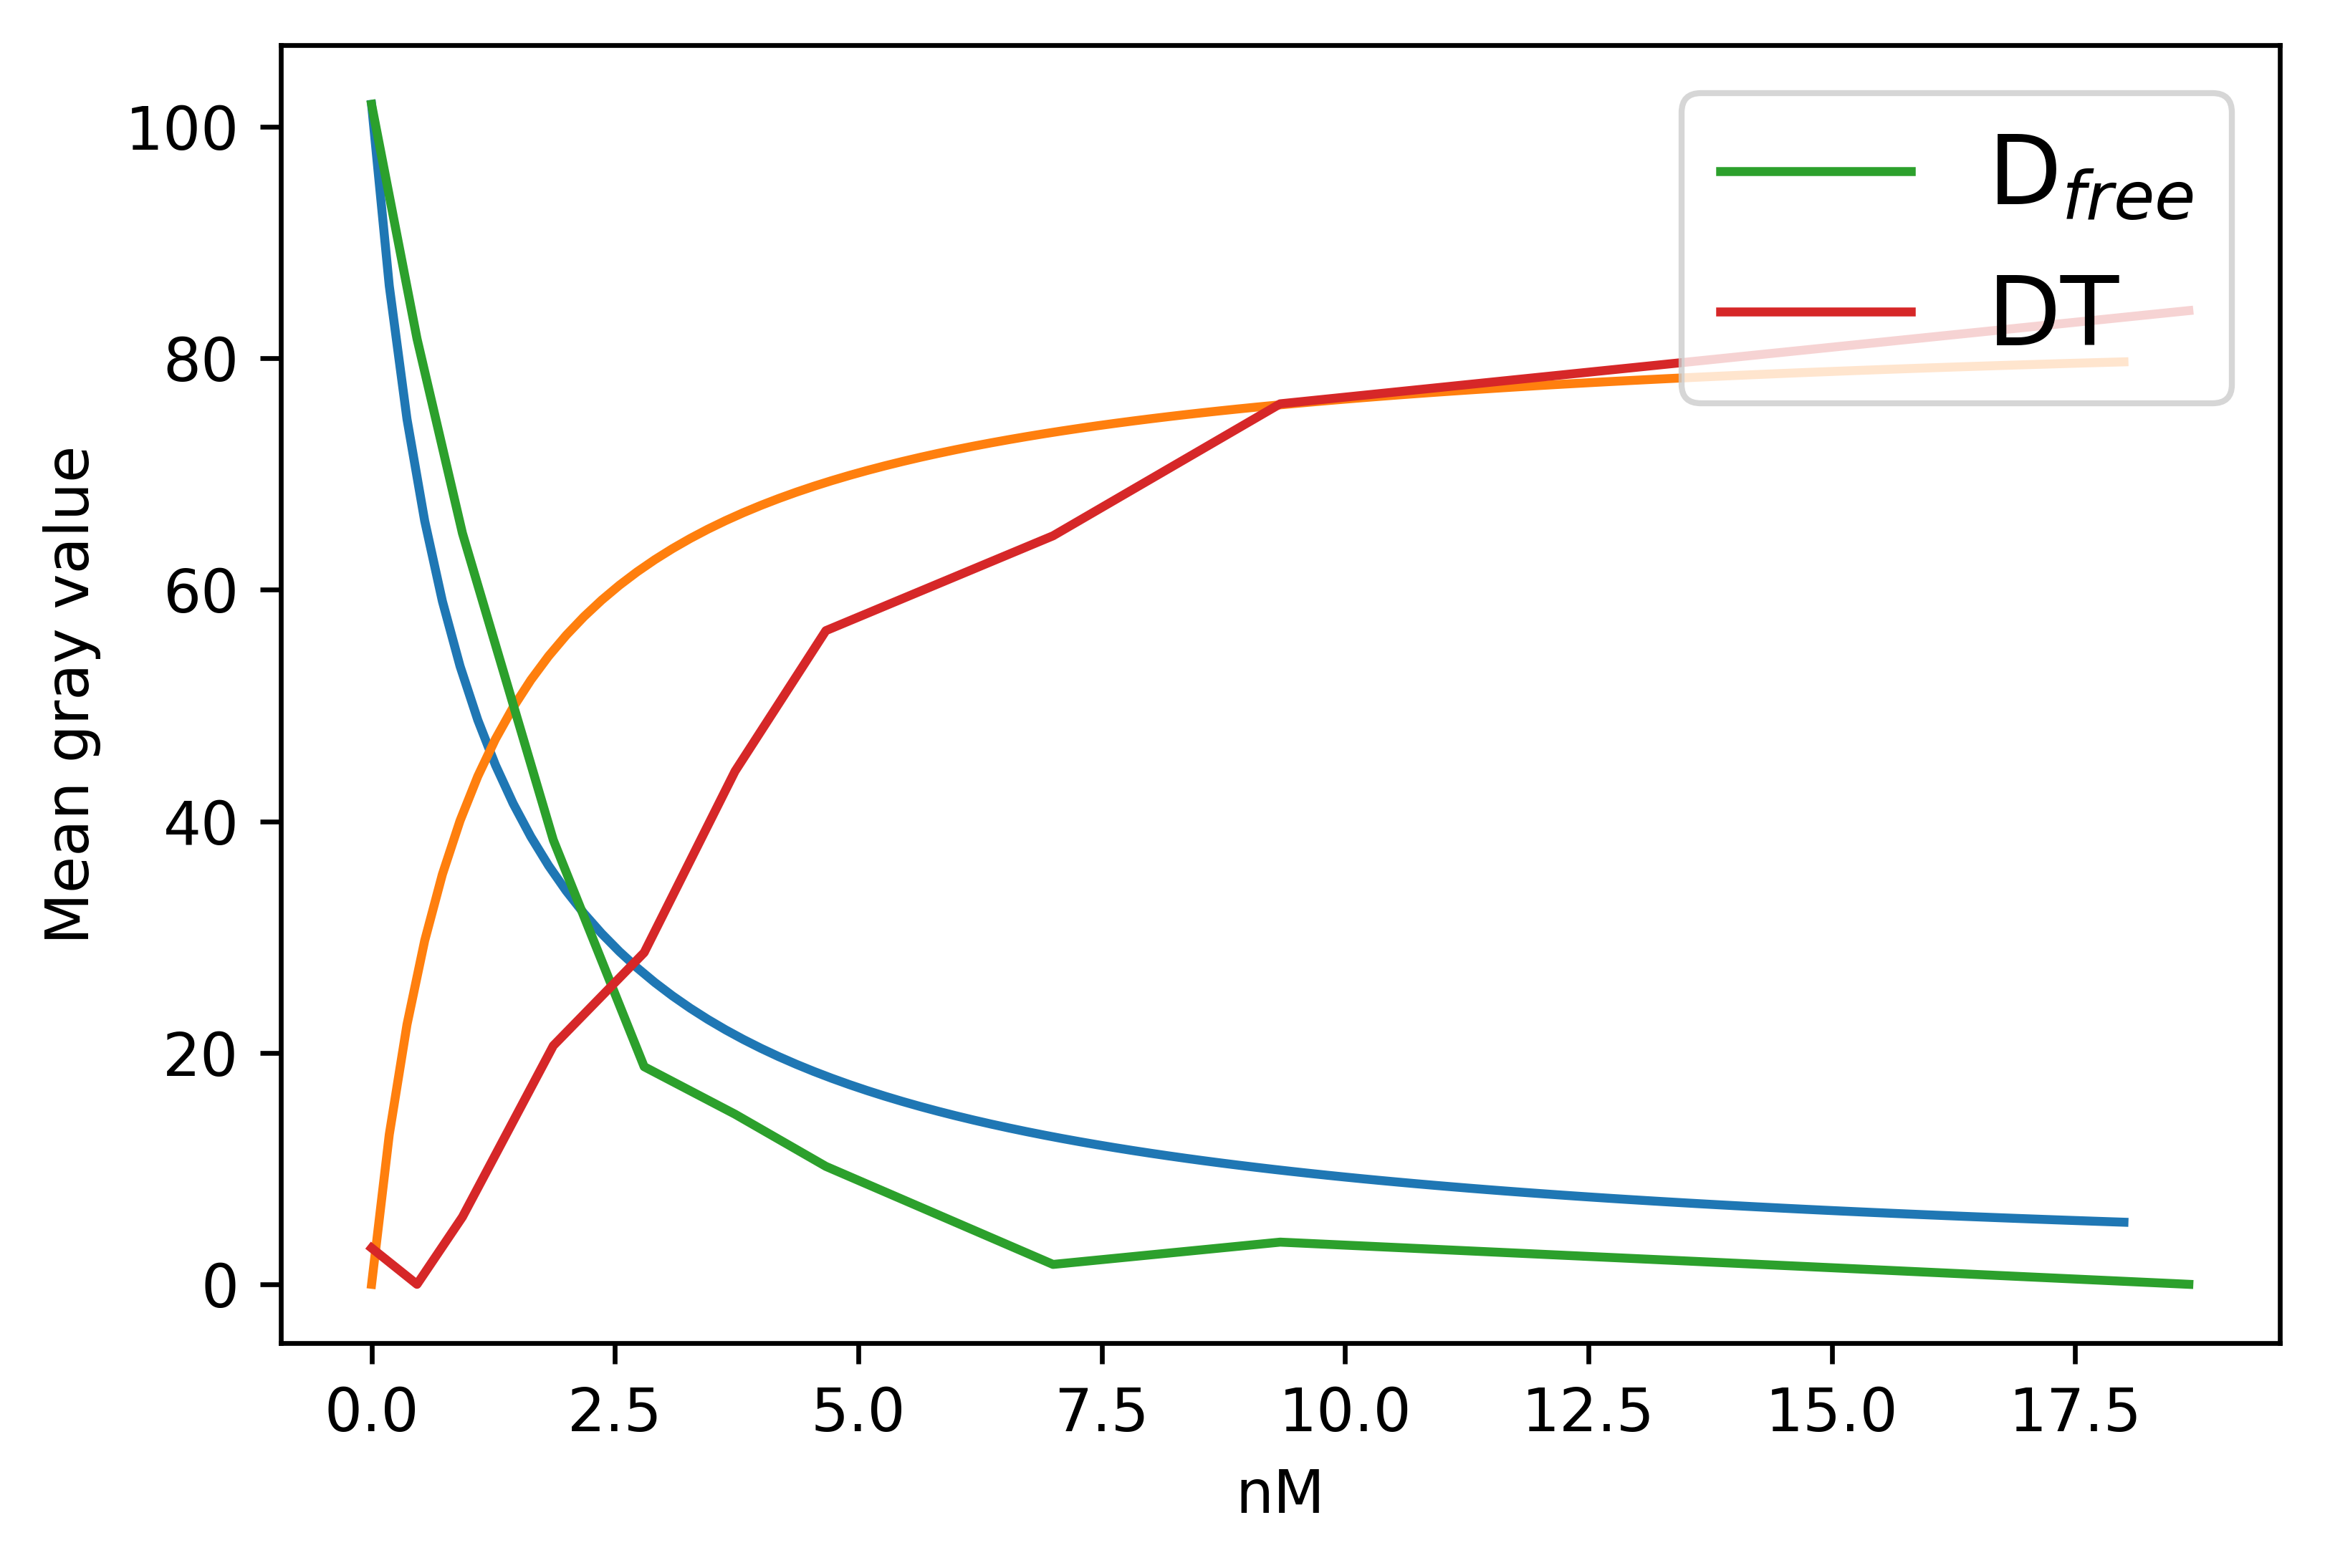

In [5]:
figure(dpi=600)
T = linspace(0,18,100)
kd=1
D = kd/(kd+T)
plot(T,D*max(B.iloc[:,2]-min(B.iloc[:,2])))
DT = T/(kd+T)
plot(T,DT*max(F.iloc[:,2]-min(F.iloc[:,2])))
plot(B.iloc[:,0],B.iloc[:,2]-min(B.iloc[:,2]), label='D$_{free}$')
plot(F.iloc[:,0],F.iloc[:,2]-min(F.iloc[:,2]), label='DT')
legend(loc='upper right', fontsize=16)
xlabel('nM')
ylabel('Mean gray value')

Text(0,0.5,'Mean gray value')

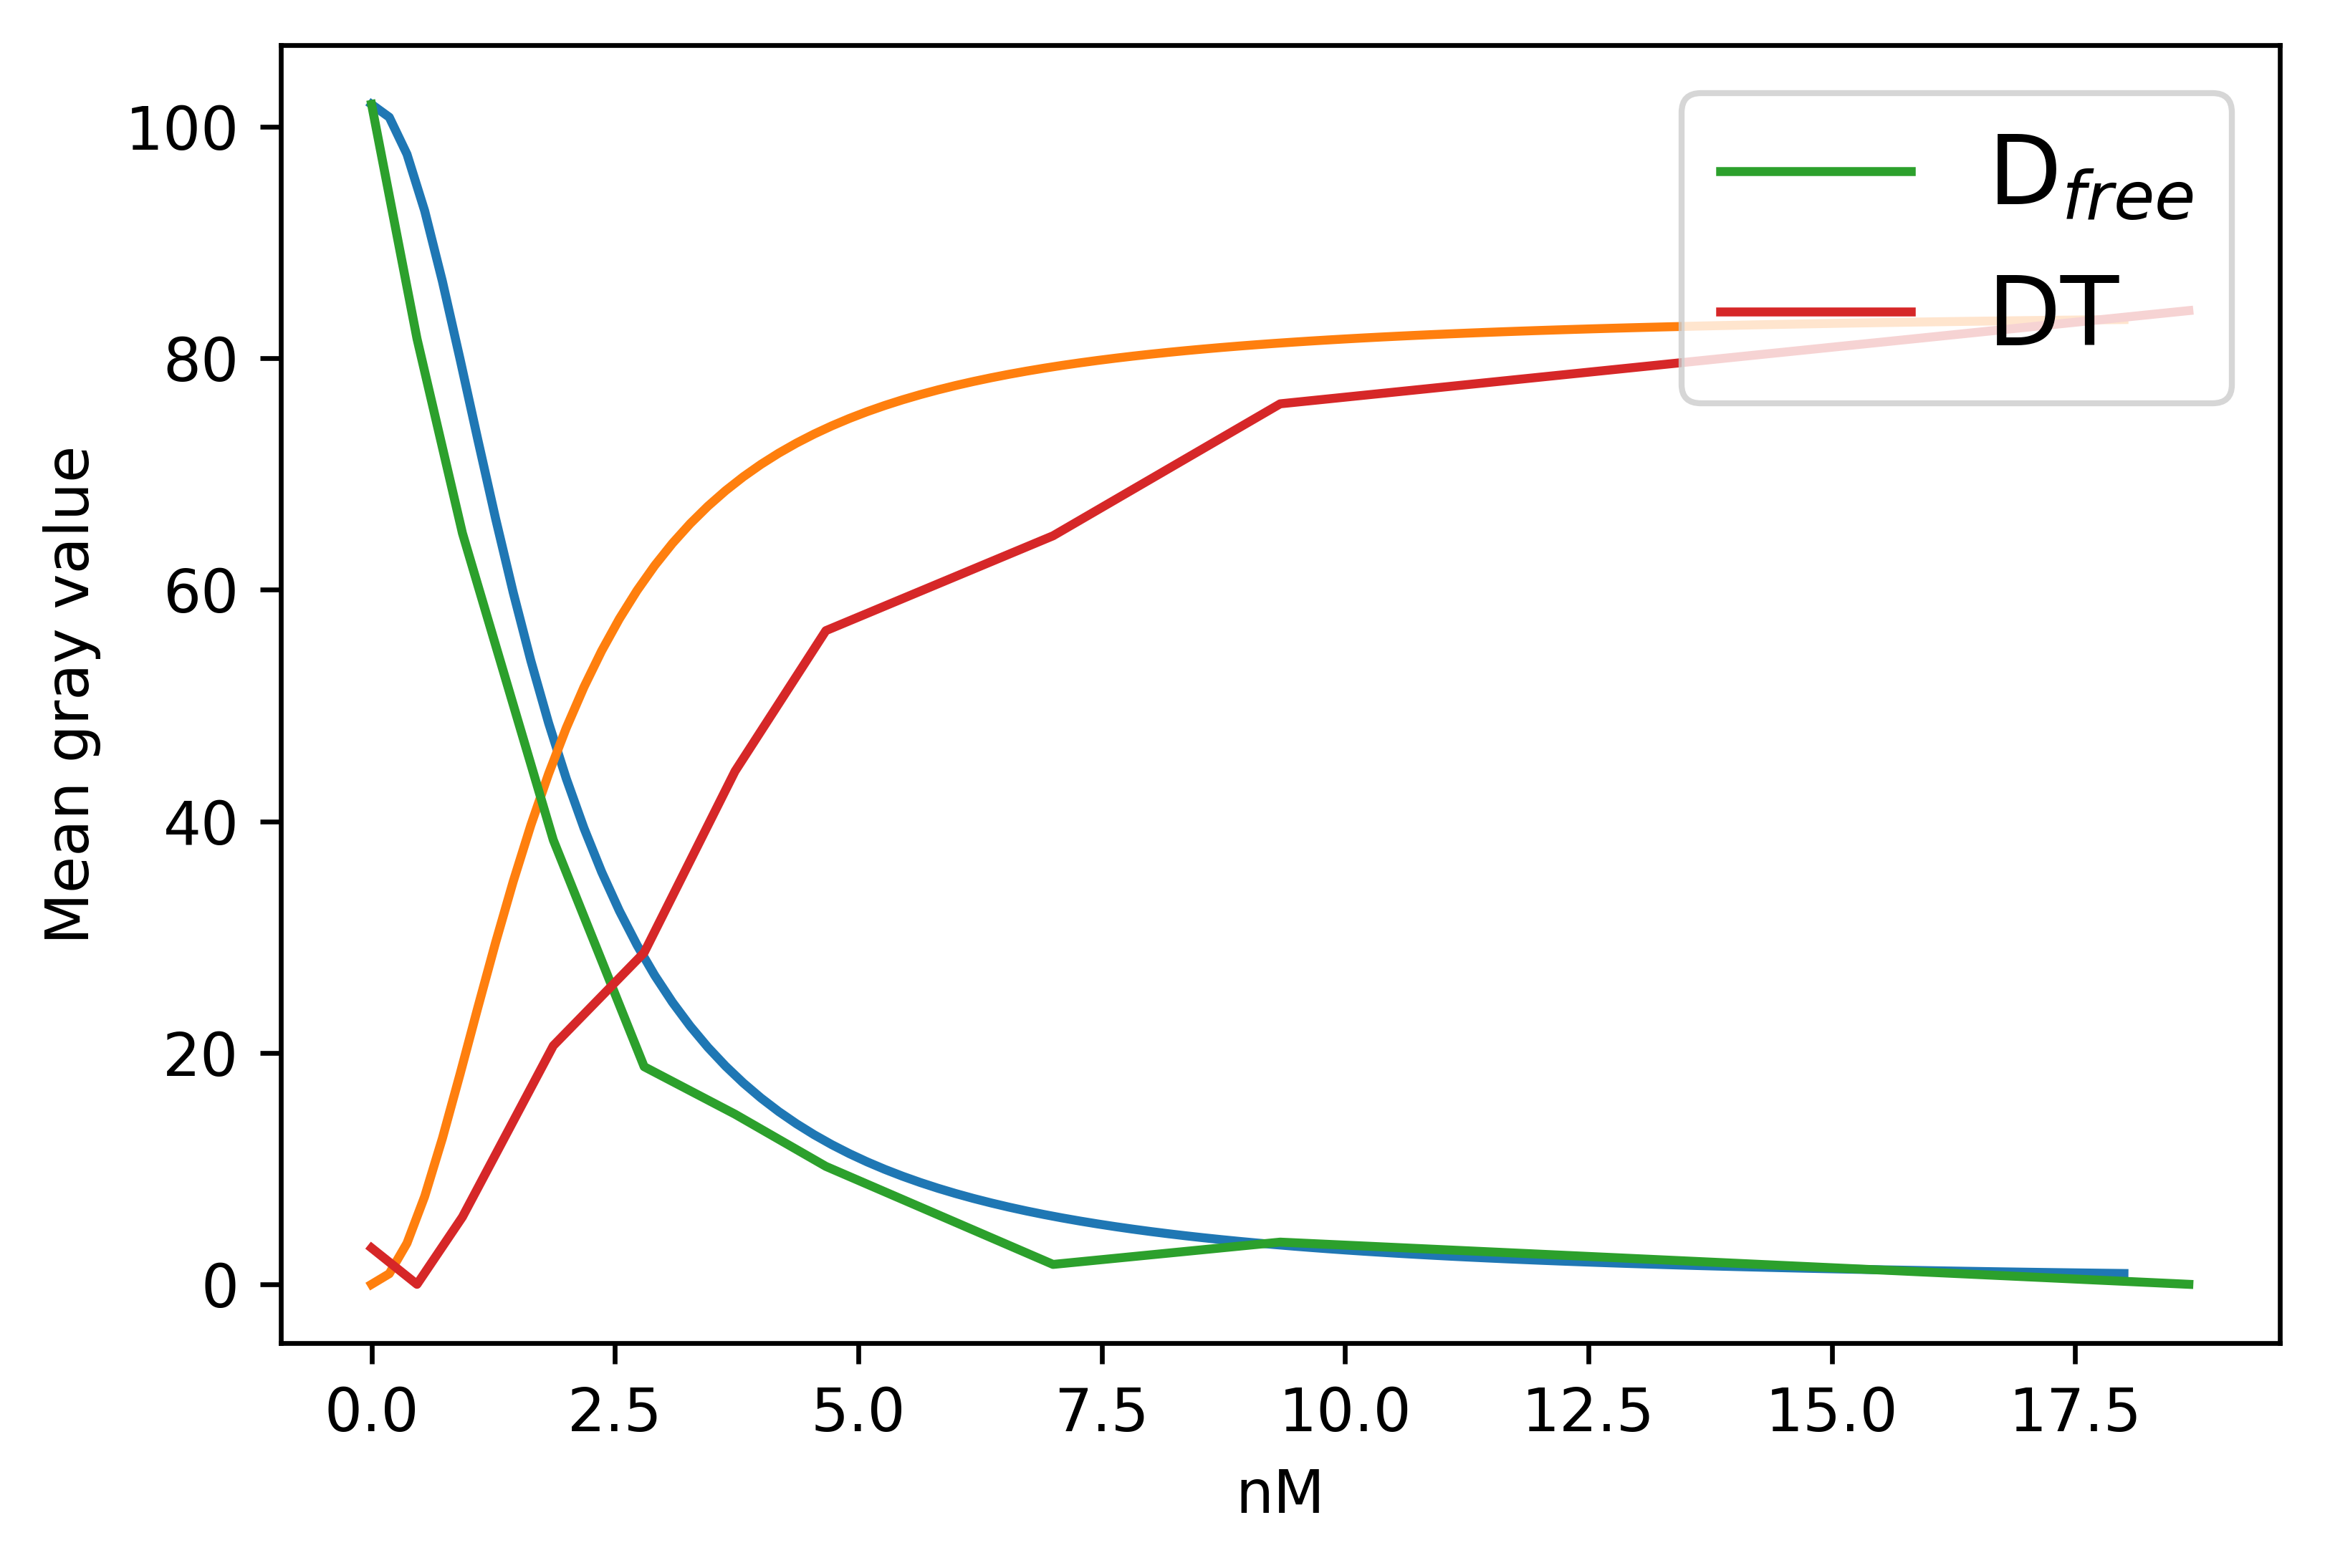

In [36]:
figure(dpi=600)
T = linspace(0,18,100)
kd=3
DT = kd**2/(kd**2+T**2)
plot(T,DT*max(B.iloc[:,2]-min(B.iloc[:,2])))
DT = T**2/(kd+T**2)
plot(T,DT*max(F.iloc[:,2]-min(F.iloc[:,2])))
plot(B.iloc[:,0],B.iloc[:,2]-min(B.iloc[:,2]), label='D$_{free}$')
plot(F.iloc[:,0],F.iloc[:,2]-min(F.iloc[:,2]), label='DT')
legend(loc='upper right', fontsize=16)
xlabel('nM')
ylabel('Mean gray value')

# Getting a cuantification of how much the model deviate from the data

If the experimental error is distributed as a normal distribution then we can use the following cost

# $\chi^2=\sum\frac{(X_i-X(\theta))^2}{\sigma_i^2}$

The cost is arbitrary however choosing this particular one allow us estimate the paramter using a maximum likelihood approach. In which we want to maximaize the probability of the model given the data

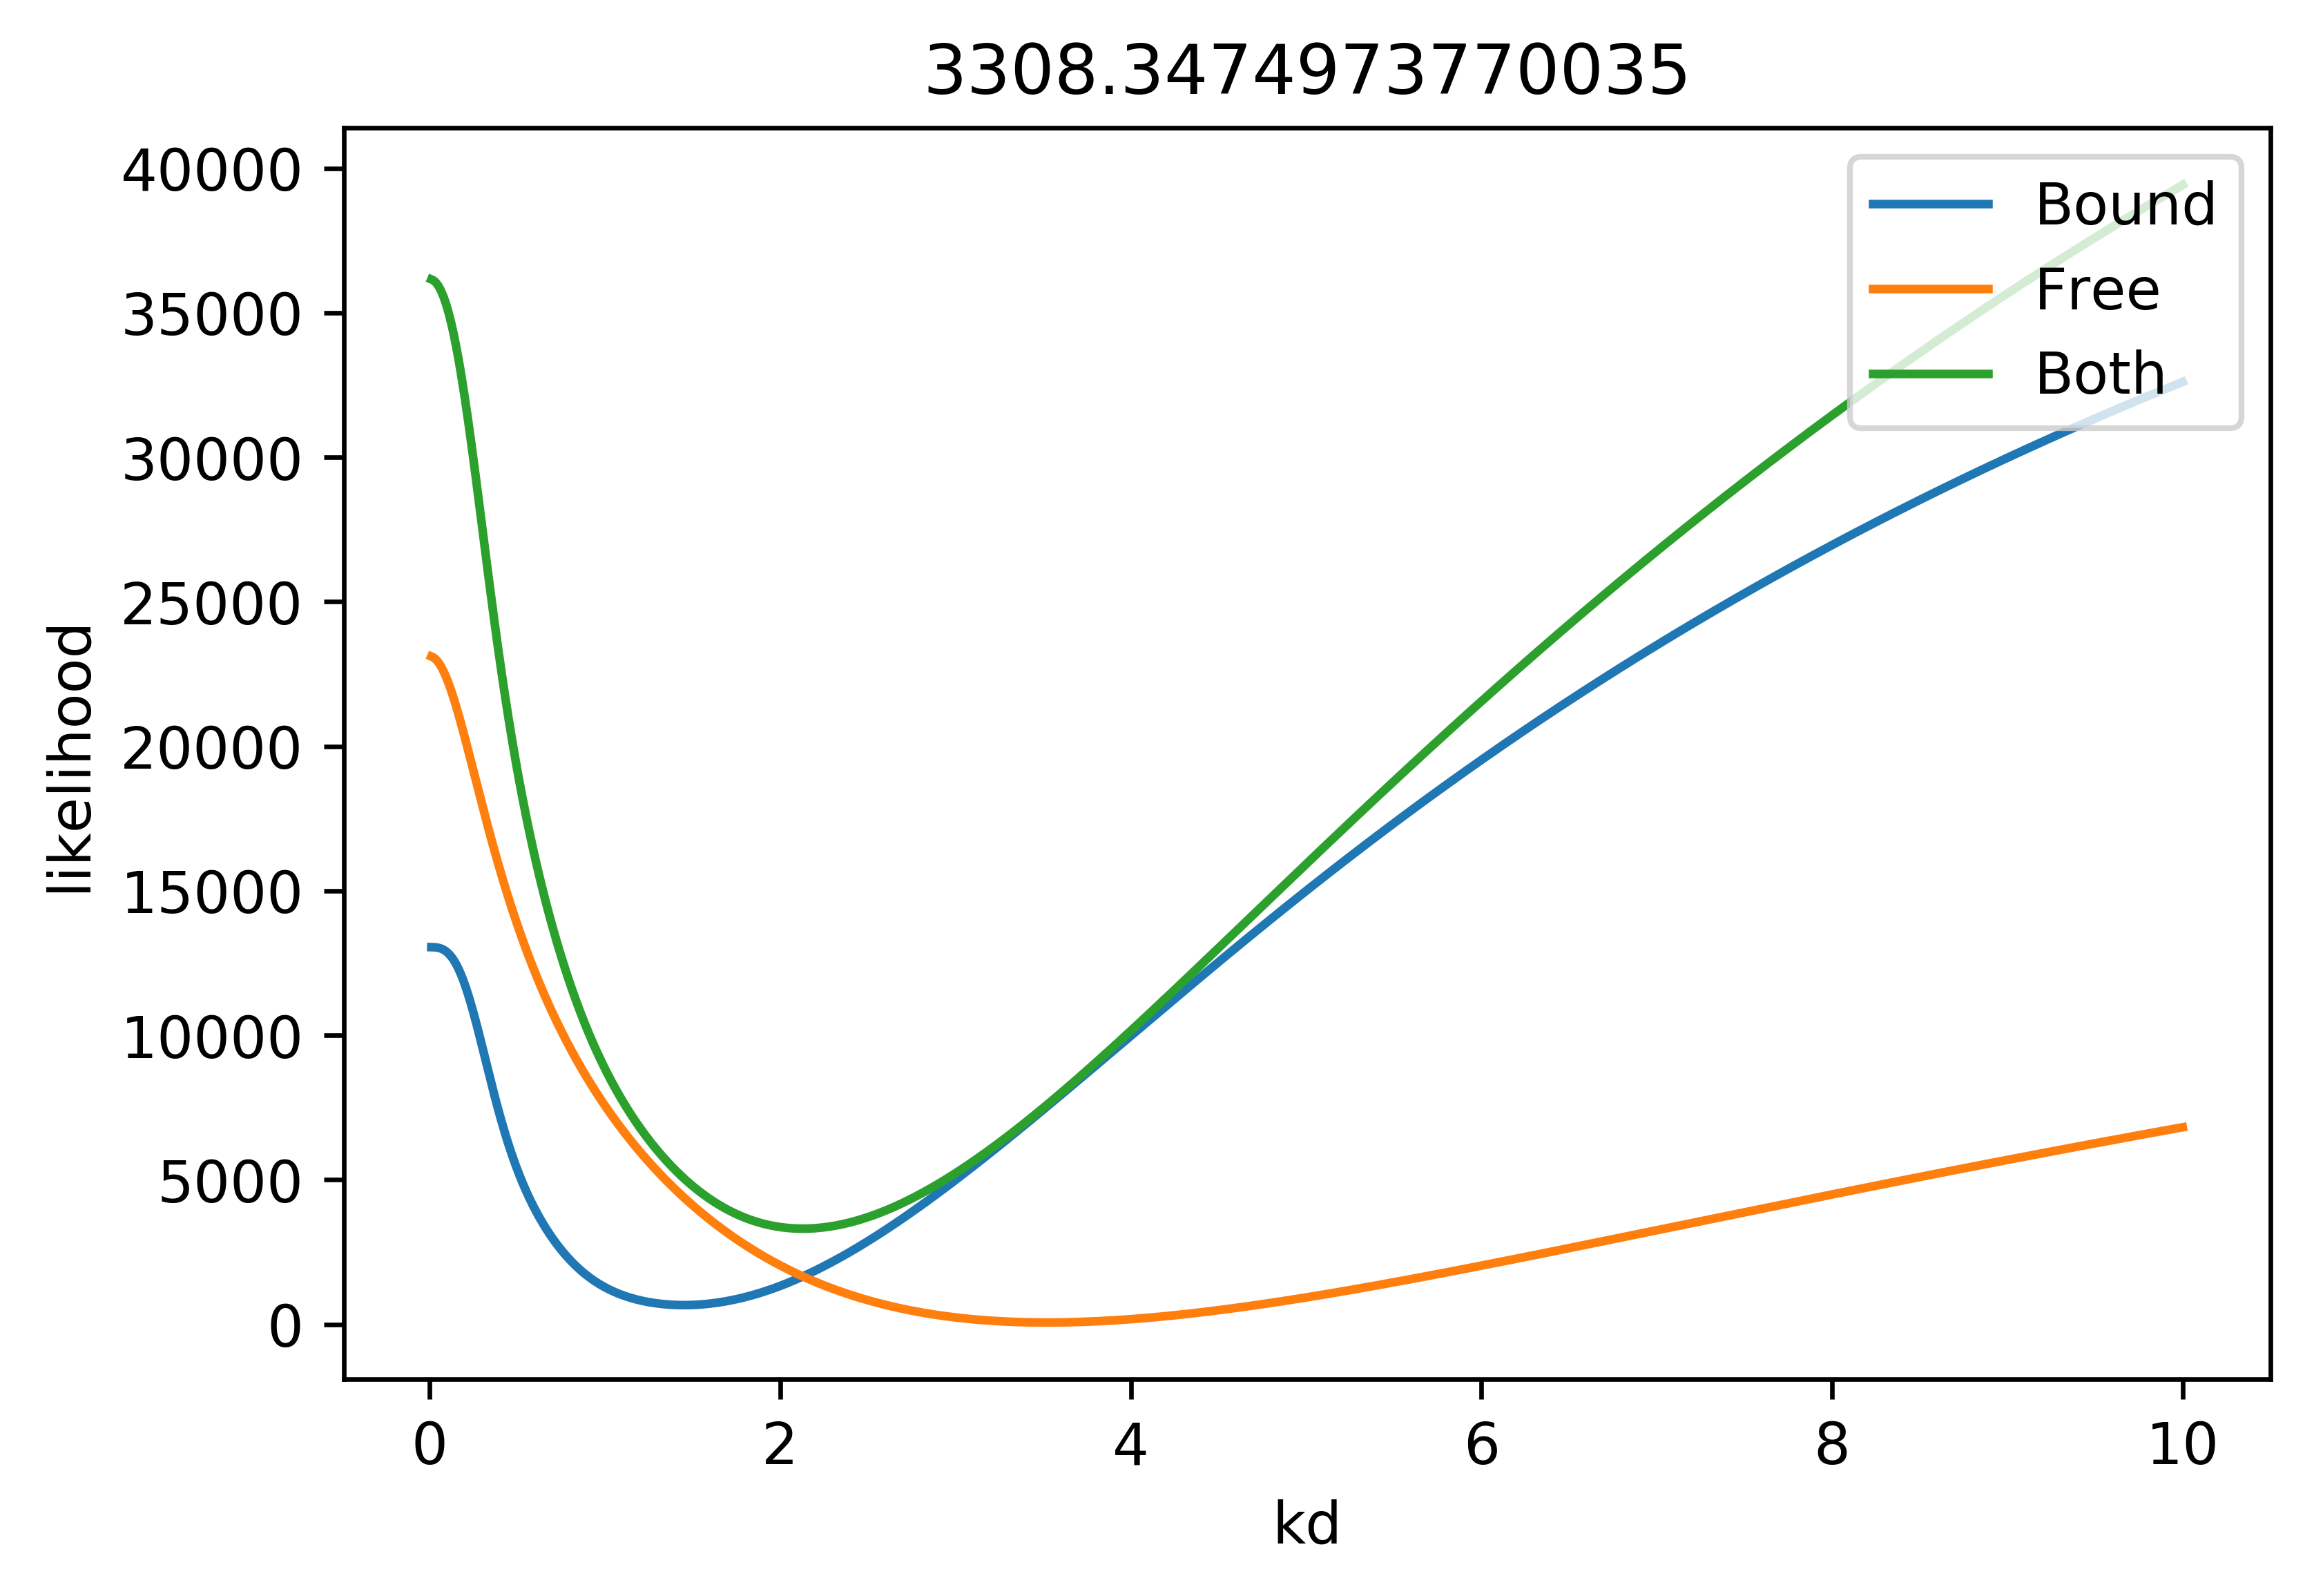

In [26]:
figure(dpi=600)
c = []
d =[]
f = []
for i in linspace(0.01,10,1000):
    a = sum(((B.iloc[:,2]-min(B.iloc[:,2]))-i**3/(i**3+B.iloc[:,0]**3)*100)**2)
    b = sum(((F.iloc[:,2]-min(F.iloc[:,2]))-F.iloc[:,0]**2/(i**2+F.iloc[:,0]**2)*max(F.iloc[:,2]-min(F.iloc[:,2])))**2)
    c.append(a)
    d.append(b)
    f.append(a+b)
plot(linspace(0.01,10,1000),c, label='Bound')
plot(linspace(0.01,10,1000),d, label='Free')
plot(linspace(0.01,10,1000),f, label='Both')
ylabel('likelihood')
xlabel('kd')
title(min(f))
legend(loc='upper right')

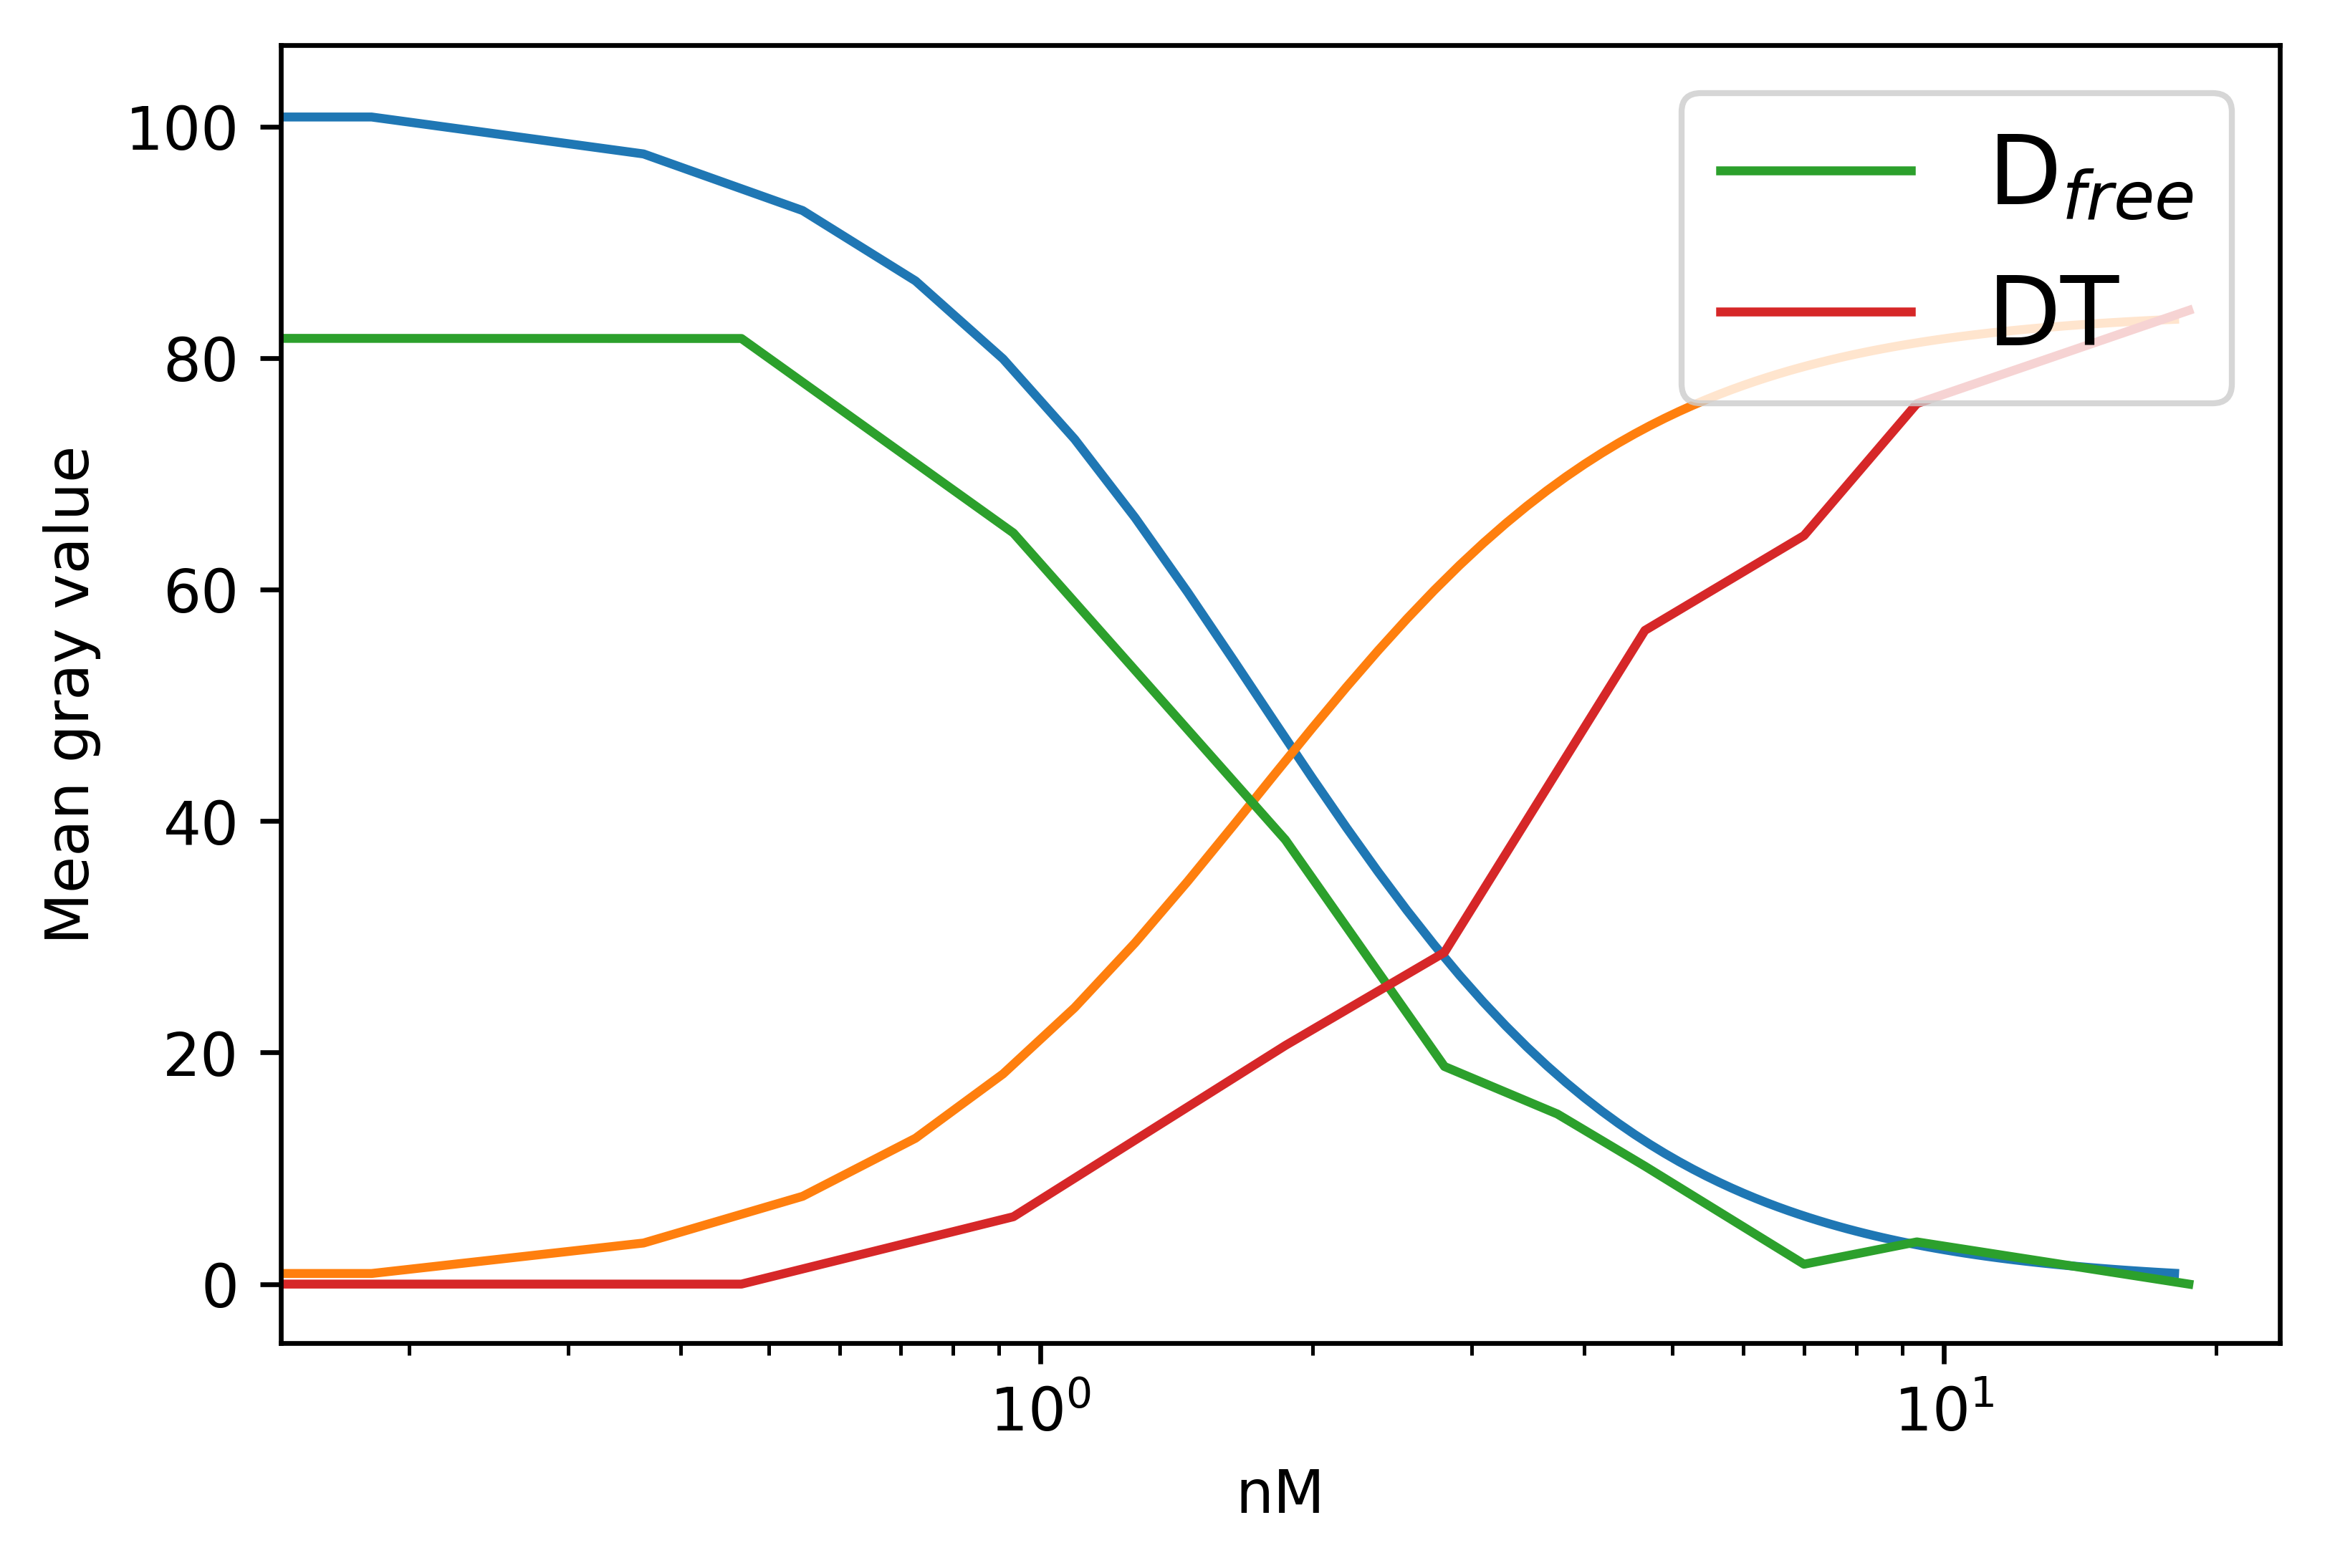

In [25]:
figure(dpi=600)
T = linspace(0,18,100)
kd=linspace(0.001,10,1000)[argmin(f)]
h=2
DT = kd**h/(kd**h+T**h)
plot(T,DT*max(B.iloc[:,2]-min(B.iloc[:,2])))
DT = T**h/(kd**h+T**h)
plot(T,DT*max(F.iloc[:,2]-min(F.iloc[:,2])))

plot(B.iloc[:,0],B.iloc[:,2]-min(B.iloc[:,2]), label='D$_{free}$')
plot(F.iloc[:,0],F.iloc[:,2]-min(F.iloc[:,2]), label='DT')
legend(loc='upper right', fontsize=16)
xlabel('nM')
ylabel('Mean gray value')
xscale('log')

Text(0.5,1,'3843.935264550415')

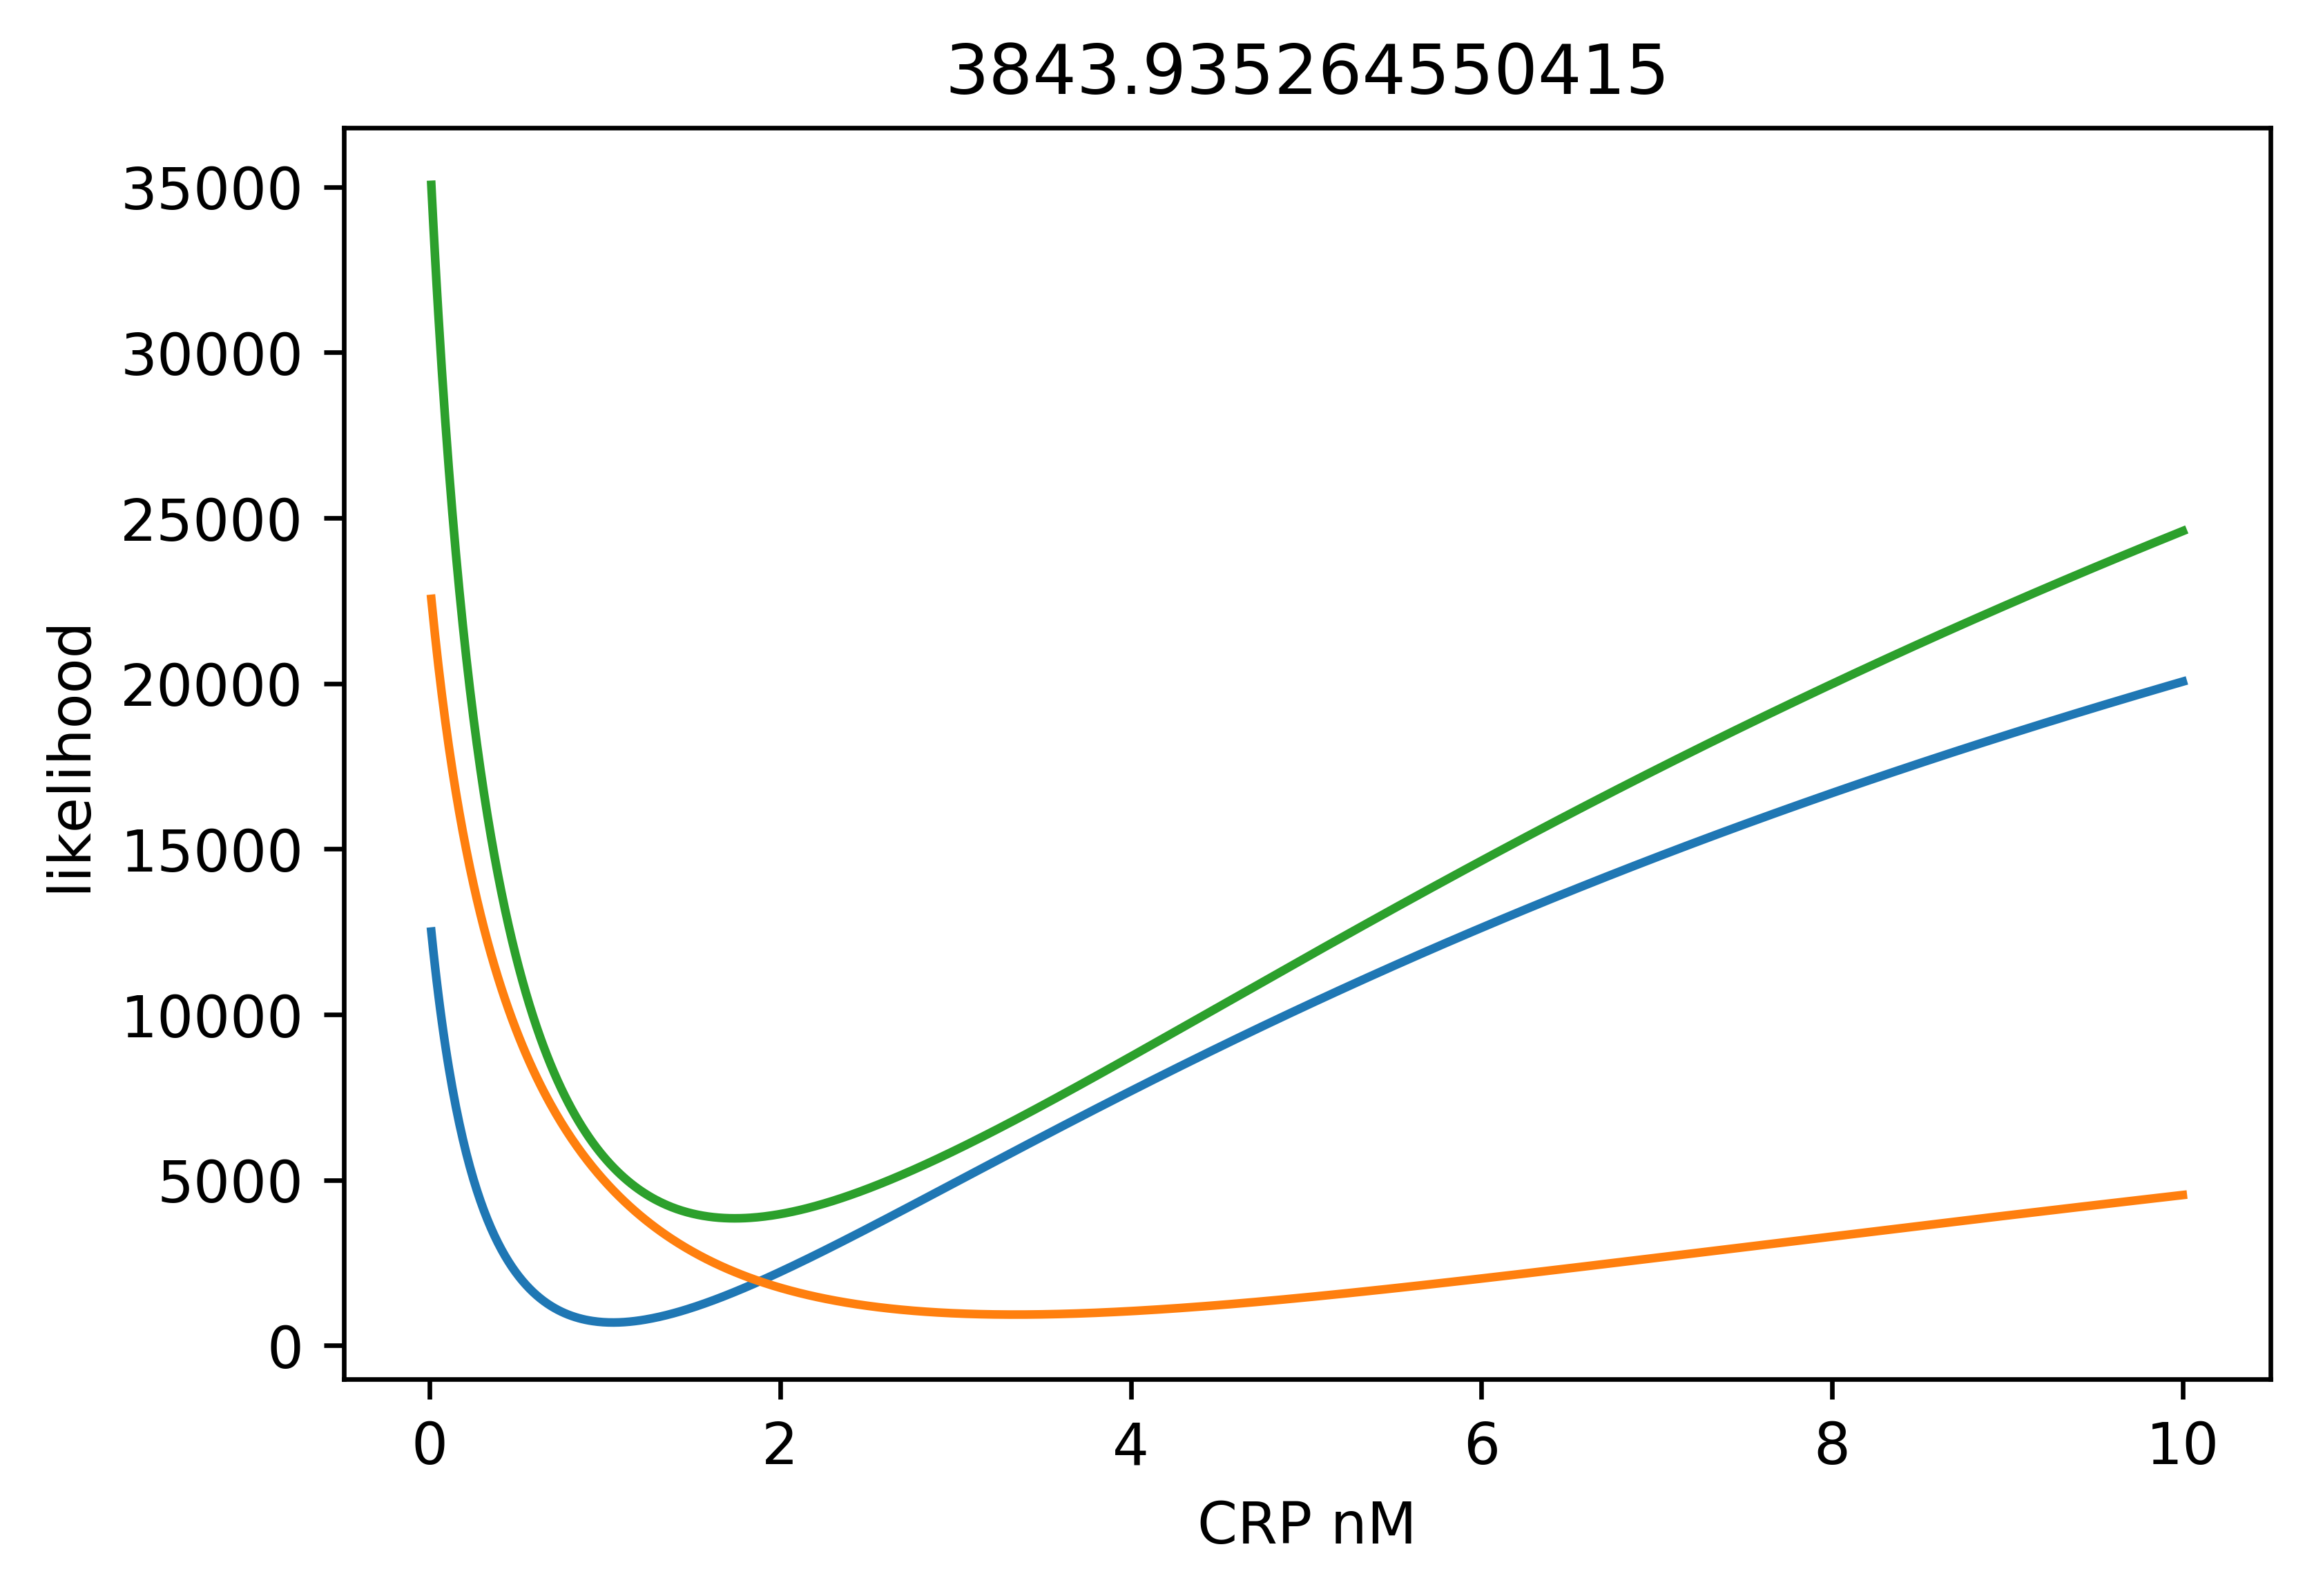

In [23]:
figure(dpi=600)
c = []
d =[]
f = []
h=1
for i in linspace(0.01,10,1000):
    a = sum(((B.iloc[:,2]-min(B.iloc[:,2]))-i**h/(i**h+B.iloc[:,0]**h)*100)**2)
    b = sum(((F.iloc[:,2]-min(F.iloc[:,2]))-F.iloc[:,0]**h/(i**h+F.iloc[:,0]**h)*max(F.iloc[:,2]-min(F.iloc[:,2])))**2)
    c.append(a)
    d.append(b)
    f.append(a+b)
plot(linspace(0.01,10,1000),c)
plot(linspace(0.01,10,1000),d)
plot(linspace(0.01,10,1000),f)
ylabel('likelihood')
xlabel('CRP nM')
title(min(f))

2.13


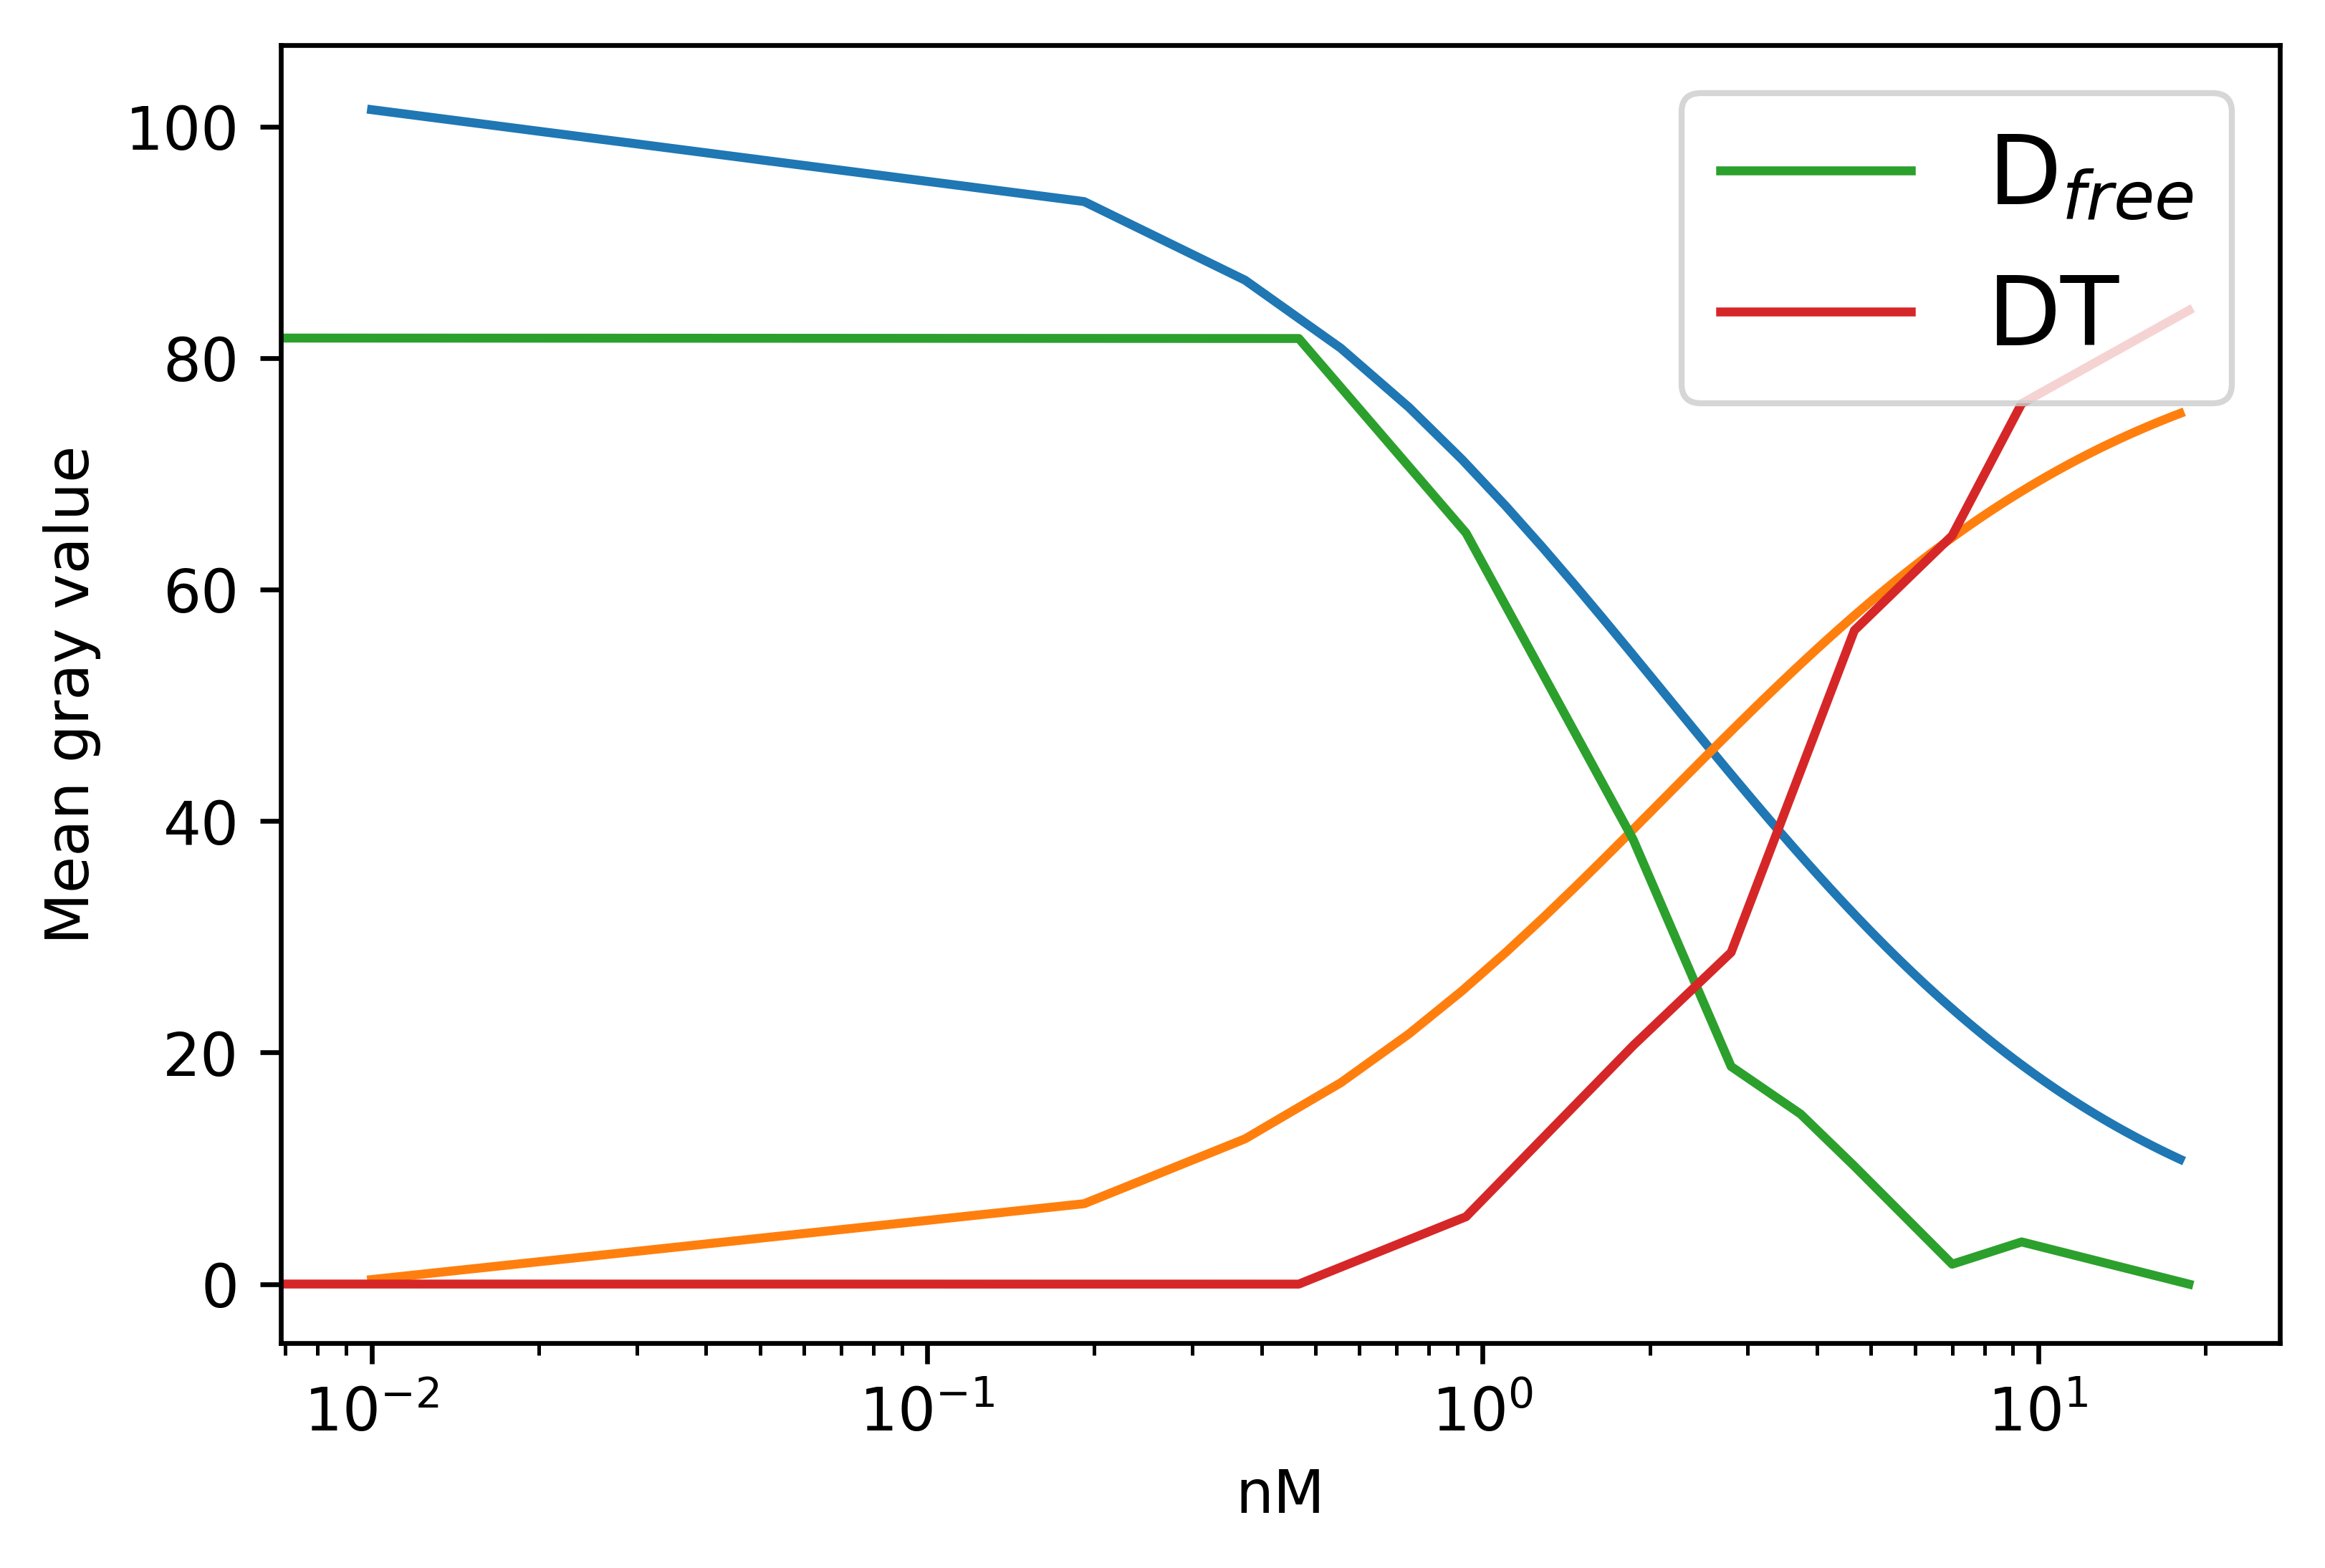

In [29]:
figure(dpi=600)
T = linspace(0.01,18,100)
kd=linspace(0.01,10,1000)[argmin(f)]
print kd
h=1
DT = kd**h/(kd**h+T**h)
plot(T,DT*max(B.iloc[:,2]-min(B.iloc[:,2])))
DT = T**h/(kd**h+T**h)
plot(T,DT*max(F.iloc[:,2]-min(F.iloc[:,2])))
plot(B.iloc[:,0],B.iloc[:,2]-min(B.iloc[:,2]), label='D$_{free}$')
plot(F.iloc[:,0],F.iloc[:,2]-min(F.iloc[:,2]), label='DT')
legend(loc='upper right', fontsize=16)
xlabel('nM')
ylabel('Mean gray value')
xscale('log')